In [15]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
import pandas as pd
pd.set_option('display.max_rows', 5)

df=pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.0,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.0,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
...,...,...,...,...,...,...,...
75%,668.5,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.0,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
df=df.drop(['PassengerId','Name'],axis=1)


<AxesSubplot:xlabel='Age', ylabel='Survived'>

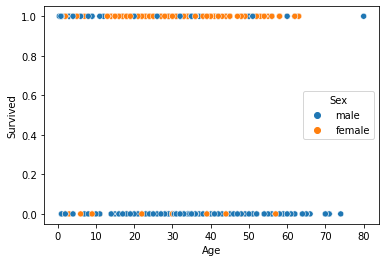

In [20]:
import matplotlib as plt
import seaborn as sns
import numpy as np

sns.scatterplot(x=df['Age'],y=df['Survived'],hue=df['Sex'])

In [28]:
male_survived_df = df[(df['Sex'] == 'male') & (df['Survived'] == 1)]
female_survived_df = df[(df['Sex'] == 'female') & (df['Survived'] == 1)]


men_survived = len(male_survived_df)
women_survived = len(female_survived_df)

print("Number of men who survived:", men_survived)
print("Number of women who survived:", women_survived)

total_men = len(df[df['Sex'] == 'male'])
total_women=len(df[df['Sex']=='female'])

proportion_men_survived=men_survived/total_men
proportion_women_survived=women_survived/total_women

print("Proportion of men who survived:",proportion_men_survived)
print("Proportion of women who survived:",proportion_women_survived)



Number of men who survived: 109
Number of women who survived: 233
Proportion of men who survived: 0.18890814558058924
Proportion of women who survived: 0.7420382165605095


In [30]:
children_under_18_survived=len(df[(df['Age']<18)&df['Survived']==1])
total_children=len(df[df['Age']<18])
proportion_children_survived=children_under_18_survived/total_children

print("Proportion of children whosurvived: ",proportion_children_survived)

Proportion of children whosurvived:  0.5398230088495575
